In [1]:
# To execute the external command and gather the output, we will need the `subprocess` module.
# Then, we will use `matplotlib` to plot the return values against the bottleneck sizes.
# First, let's define the function to execute the command and parse the return value.

import subprocess
import matplotlib.pyplot as plt
import time

def run_executable(bottleneck_size):
    dataset_file = f'reduced_dataset_{bottleneck_size}.dat'
    query_file = f'reduced_query_{bottleneck_size}.dat'
    
    # Construct the command with the appropriate file names
    command = f'./lshReduced -d dataset.dat -q query.dat -k 30 -L 10 -o testlsh.txt -N 1 -dr reduced_dataset.dat -qr reduced_query.dat -dr {dataset_file} -qr {query_file}'
    
    # Execute the command
    start_time = time.time()
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    end_time = time.time()
    print(result.stdout)
    # Parse the return value from the output
    execution_time = end_time - start_time
    output_lines = result.stdout.split('\n')
    for line in output_lines:
        if "Return Value:" in line:
            return_value = float(line.split(':')[1].strip())
            return return_value, execution_time
    return None, execution_time

# We will now loop through the bottleneck sizes, execute the command for each, and store the results.

return_values = []
execution_times = []

for bottleneck_size in range(10,31,2):
    value, time_taken = run_executable(bottleneck_size)
    execution_times.append(time_taken)
    if value is not None:
        return_values.append(value)
    else:
        return_values.append(float('nan'))  # If the value is not found, append NaN




Return Value: 1.99981

Return Value: 1.86397

Return Value: 1.6403

Return Value: 1.64371

Return Value: 1.50182

Return Value: 1.52091

Return Value: 1.65961

Return Value: 1.52552

Return Value: 1.44612

Return Value: 1.53932

Return Value: 1.45228



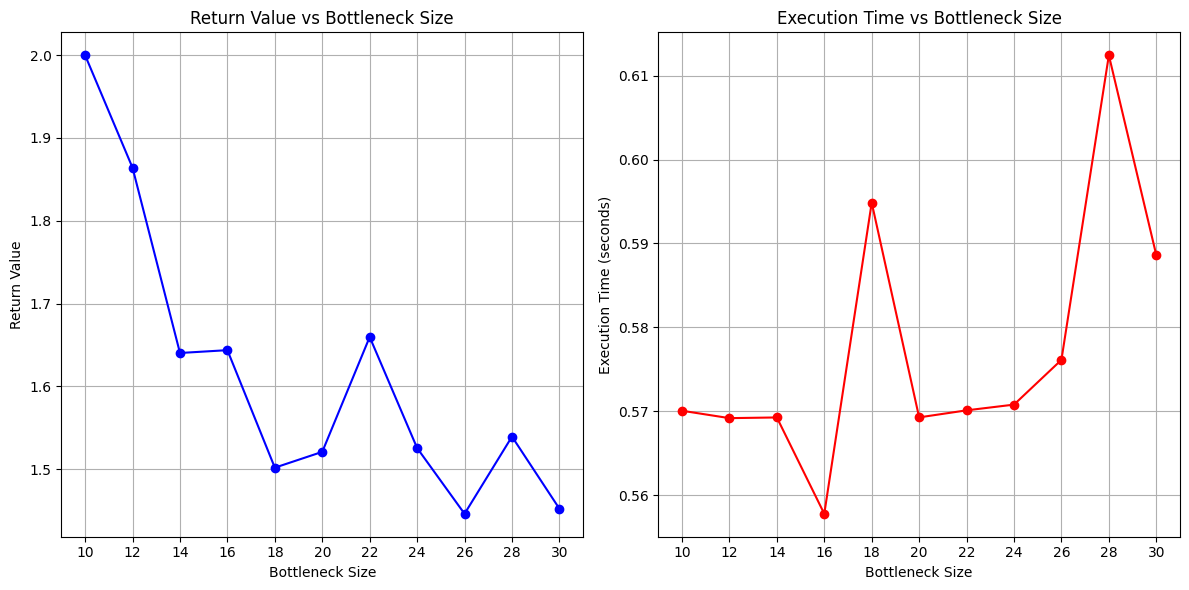

In [2]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
bottleneck_sizes = list(range(10,31,2))
plt.plot(bottleneck_sizes, return_values, marker='o', linestyle='-', color='b')
plt.title('Return Value vs Bottleneck Size')
plt.xlabel('Bottleneck Size')
plt.ylabel('Return Value')
plt.xticks(bottleneck_sizes)
plt.grid(True)

# Plotting the execution times
plt.subplot(1, 2, 2)
plt.plot(bottleneck_sizes, execution_times, marker='o', linestyle='-', color='r')
plt.title('Execution Time vs Bottleneck Size')
plt.xlabel('Bottleneck Size')
plt.ylabel('Execution Time (seconds)')
plt.xticks(bottleneck_sizes)
plt.grid(True)

plt.tight_layout()
plt.show()